In [29]:
import numpy as np
import pandas as pd

In [30]:
x1 = np.random.uniform(0,1,20000)
x2 = np.random.uniform(0,1,20000)
x3 = np.random.uniform(0,1,20000)
x4 = np.random.uniform(0,1,20000)
x5 = np.random.uniform(0,1,20000)
x6 = np.random.uniform(0,1,20000)
x7 = np.random.uniform(0,1,20000)
x8 = np.random.uniform(0,1,20000)
x9 = np.random.uniform(0,1,20000)
x10= np.random.uniform(0,1,20000)

### Create Drifts
All drifts are sudden/abrupt.

1. Drift @ [5000:7500]: x1, x3 and x5 are now np.random.uniform(-1,2,2500)
2. Drift @ [10000:12500]: y changes from y_org to y_1) --> Remove label shift 
3. Drift @ [15000:17500]: Drift 1 and 2 appear together

vgl. Vasiloudis (2019)

In [31]:
# Validation drift
x1[2000:3000]=np.random.uniform(-1,2,1000)
x3[2000:3000]=np.random.uniform(-1,2,1000)
x5[2000:3000]=np.random.uniform(-1,2,1000)

# 1. Drift
x1[5000:7500]=np.random.uniform(-1,2,2500)
x3[5000:7500]=np.random.uniform(-1,2,2500)
x5[5000:7500]=np.random.uniform(-1,2,2500)

# 2. Drift
x7[10000:12000]=np.random.uniform(-1,2,2000)
x9[10000:12000]=np.random.uniform(-1,2,2000)
x10[10000:12000]=np.random.uniform(-1,2,2000)

# 3. Drift
x1[16000:20000]=np.random.uniform(-1,2,4000)
x3[16000:20000]=np.random.uniform(-1,2,4000)
x5[16000:20000]=np.random.uniform(-1,2,4000)

#y_org = 10*np.sin(np.pi*x1*x2)+20*(x3-0.5)**2 + 10*x4 + 5*x5 + np.random.normal(0,1)
y_1 = 10*np.sin(np.pi*x4*x5)+20*(x2-0.5)**2 + 10*x1 + 5*x3 + np.random.normal(0,1)

In [42]:
relevant_drift_points = [2000, 3000, 5000, 7500, 16000]
irrelevant_drift_points = [10000, 12000]

In [32]:
data = pd.DataFrame([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10, y_org, y_1]).transpose()
data.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10', 'y_org', 'y_1']

In [33]:
#data['y_global_abrupt3'] = data['y_org']
#data['y_global_abrupt3'][10000:12500] = data['y_1'][10000:12500]
#data['y_global_abrupt3'][15000:17500] = data['y_1'][15000:17500]

In [34]:
data = data.drop(['y_org'], axis = 1)

In [35]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y_1
0,0.990323,0.295195,0.985066,0.153509,0.971696,0.828571,0.376036,0.003308,0.471942,0.588665,20.873051
1,0.945133,0.836165,0.850556,0.437139,0.396555,0.030337,0.529915,0.440972,0.113674,0.702913,21.834071
2,0.719979,0.621302,0.086242,0.024708,0.883501,0.855673,0.634770,0.641972,0.868885,0.930501,9.299647
3,0.823447,0.599436,0.032399,0.737722,0.284384,0.168977,0.743067,0.334343,0.619894,0.371821,15.407333
4,0.758288,0.874209,0.901630,0.266148,0.125115,0.801503,0.071912,0.124997,0.320607,0.078410,16.624996
...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.842050,0.070262,1.058054,0.690863,-0.986042,0.601739,0.556676,0.943032,0.948944,0.450994,-7.170327
19996,0.282762,0.459768,-0.822824,0.480398,-0.224041,0.410742,0.597070,0.105123,0.731664,0.627723,-3.882229
19997,-0.492764,0.513361,0.562235,0.267323,-0.306629,0.111063,0.900216,0.330584,0.381724,0.959858,-3.970564
19998,0.290170,0.525566,0.566267,0.237261,-0.639591,0.348820,0.991760,0.865608,0.113224,0.572209,1.846395


In [36]:
data.to_csv('friedman_with_2_abrupt_drift.csv', index=False)

In [37]:
import matplotlib.pyplot as plt

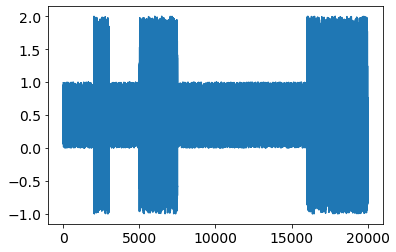

In [38]:
plt.plot(data['x1'])

In [39]:
#plt.plot(data['y_global_abrupt3'])

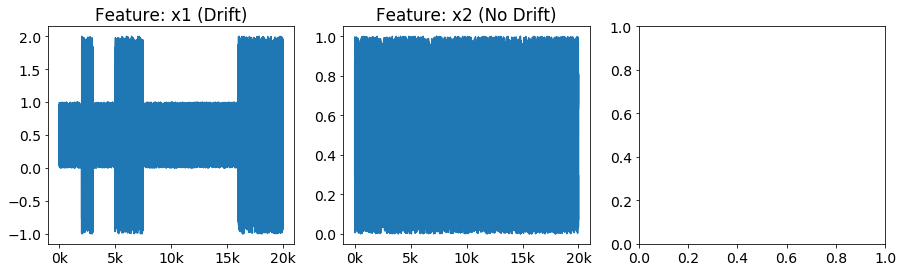

In [40]:
import matplotlib.ticker as ticker

#Plot features
font = {'size'   : 14}

plt.rc('font', **font)
fig, ax = plt.subplots(1, 3, figsize=(15,4))


ax[0].plot(data['x1'])
ax[0].set_title('Feature: x1 (Drift)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[1].plot(data['x2'])
ax[1].set_title('Feature: x2 (No Drift)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

#ax[2].plot(data['y_global_abrupt3'])
#ax[2].set_title('Target')
#ax[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



plt.savefig('friedman_abrupt.png', bbox_inches='tight', dpi=300)
